# **TP4 AA1:Regresión + MLP**

**Valentina Micaela Zoe Krabbe- 45207992**

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien más en el foro.
  - Puede comentar más de un posteo de sus compañeros siempre y cuando el intercambio sea respetuoso y fructífero.
* Deben postear como solución un enlace a su notebook colab público y también un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su solución y explique lo realizado. Duración máxima: 5 minutos. Puede grabarse a Ud. mismo usando una sesión de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces erróneos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.


#**Tarea: Aplicación de Regresión Lineal y Análisis de Importancia de Variables**  
**Objetivo**: Aplicar un modelo de regresión lineal a un dataset de su elección, evaluar su rendimiento e identificar las variables más relevantes para la predicción.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets/?Task=Regression&skip=0&take=10&sort=desc&orderBy=NumHits&search=  
   - Requisitos:  
     - Debe tener al menos 4 variables numéricas continuas (1 target, 3 o más features).  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## Resolución:

El dataset que elegi es el de **MPG automático**. Este conjunto de datos proporciona informcion sobre el consumo de combustible de automoviles fabricados en diferentes años.

Son 398 registros de autos diferentes.

Sus variables:
* Mpg (millas por galon)
* Cylinders (numero de cilindros)
* Displacement (desplazamiento del motor, en ulgadas cubicas)
* Horsepower (caballos de fuerza)
* Weight (peso en libras)
* Acceleraction (aceleracion, en segundos de 0 a 60 mph)
* Model of year (año del modelo)
* Origin (origen del auto)
* Car name (nombre del auto)

Este dataset tiene más de 3 features numericas continuas y sus variables tienen diferentes variables y escalas (peso en libras, desplazamiento en pulgadas cubicas, etc)

In [59]:
import pandas as pd
import numpy as np
url='https://raw.githubusercontent.com/valentina-krabbe/Aprendizaje-Autom-tico-1/refs/heads/main/auto-mpg.data'

#Este dataframe no esta separado por comas sino que por espacios, y tampoco tiene las columnas
df=pd.read_csv(url,sep='\s+')
df.columns=['mpg','cilindros','cilindrada','caballos_fuerza','peso','aceleracion','ano_modelo','origen','nombre_auto']

#Me encontre con que no estaba tomando bien la columna 'caballos_fuerza', entonces le especificamos que la columna es numerica
df['caballos_fuerza'] = pd.to_numeric(df['caballos_fuerza'], errors='coerce')

In [60]:
df.head()

,mpg,cilindros,cilindrada,caballos_fuerza,peso,aceleracion,ano_modelo,origen,nombre_auto
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500



## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - **Pregunta clave**: ¿Qué relaciones lineales preliminares observan?  


## Resolución:

###Media para cada columna de la tabla:

**mpg: 23.51**

Esto nos indica que en promedio los vehiculos tienen un rendimiento de combustible de aproximadamente 23.51 millas por galon.

**cilindros: 5.45**

Esto nos indica que en promedio los vehiculos tienen 5-6 cilindros.

**cilindrada:193.43**

La media de 193.43 indica que el tamaño 'normal' de los motores de estos vehiculos.

**caballos_fuerza: 104.47**

Significa que generalmente los vehiculos tienen una potencia de motor de 104.47 unidades.


**peso: 2970.42**

En promedio los vehiculos pesan de 2970.42 unidades de peso.

**acleracion: 15.57**

En promedio a estos vehiculos les toma 15.57 segundos para acelerar desde parado hasta que toma una velocidad determinada.

**ano_modelo: 76.01**

Sugiere que la mayoria son aproximadamente del 1976.

**origen: 1.57**

En el dataset cada numero hace referencia a un pais de origen.

In [61]:
df.describe()

,mpg,cilindros,cilindrada,caballos_fuerza,peso,aceleracion,ano_modelo,origen
count,397.000000,397.000000,397.000000,391.000000,397.000000,397.000000,397.000000,397.000000
mean,23.528463,5.448363,193.139798,104.404092,2969.080605,15.577078,76.025189,1.574307
std,7.820926,1.698329,104.244898,38.518732,847.485218,2.755326,3.689922,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.900000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,93.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3609.000000,17.200000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


###Histograma para ver la distribucion de las variables



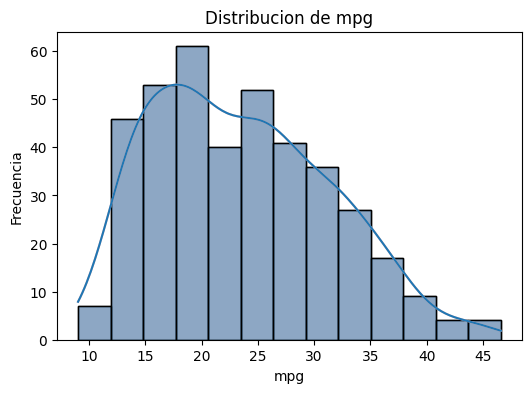

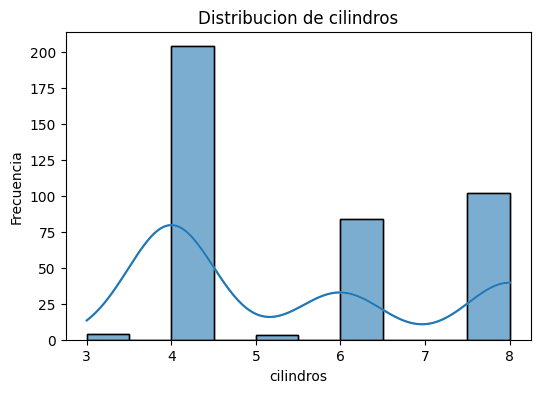

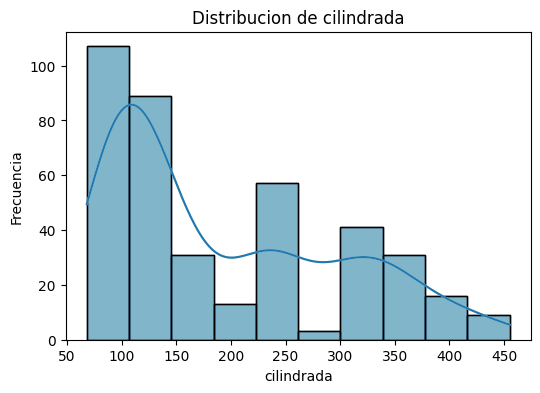

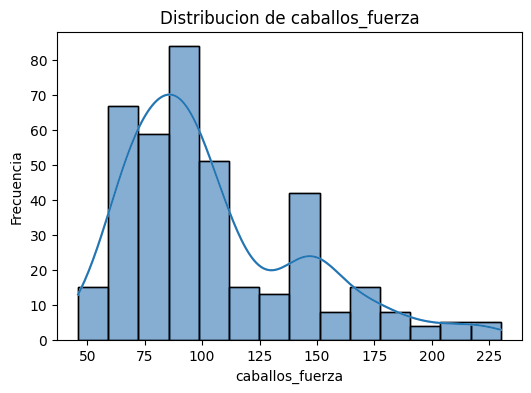

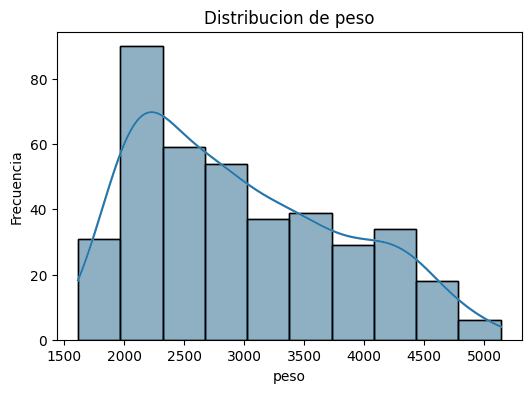

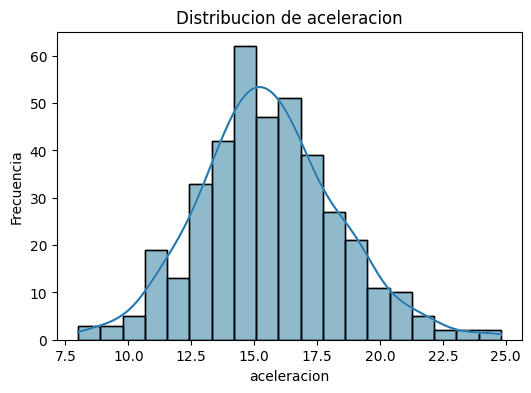

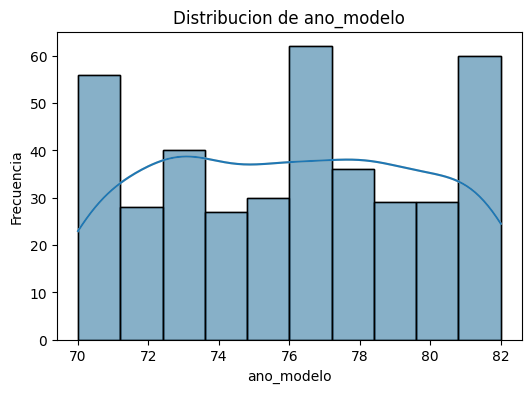

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

#Creamos una lista con los nombre de las columnas de nuestro df
variables=['mpg','cilindros','cilindrada','caballos_fuerza','peso','aceleracion','ano_modelo']
#Paleta de colores:
color=sns.color_palette('Pastel1',n_colors=len(variables))

#Creamos el bucle for que se repetira una vez por cadad nombre en la lista 'variables'. En cada repeticion, 'var' es el nombre de la columna y 'i' es su numero de orden (0,1,2,...)
for i, var in  enumerate(variables):
  plt.figure(figsize=(6,4)) #Creamos la figura
  sns.histplot(df[var],kde=True,color=color[i]) #Dibuja las barras del histograma
  sns.histplot(df[var],kde=True) #ES una opcion de hisplot para dibujar una linea que muestre la forma general de la distribucion
  plt.title(f'Distribucion de {var}') #Ponemos titulo
  plt.xlabel(var)
  plt.ylabel('Frecuencia')


**Grafico mpg:**

Vemos un solo pico, lo que significa que hay un rango de valores de MPG que es mucho mas frecuente que otros. Vemos tambien un ligero sesgo a la derecha del grafico, lo que indica que la mayoria de los vehiculos tienen un nivel bajo de mpg. En resumen vemos que predominan los vehiculos con baja eficiencia de combustible, pero existe una variedad de eficiencias, algunas sigficativamente mas altas pero en menor cantidad.

**Grafico cilindros:**

Podemos distinguir 3 picos (4,6 y 8 cilindros). Nos indica que hay tres grupos principales.

**Grafico cilindrada:**

Podemos ver un pico o casi dos que logran predominar el grafico, pero ademas una relacion directa con la columna 'mpg' y 'cilindros'

* **cilindros y cilindrada**: cuando el numero de cilindros de un vehiculo es bajo, su cilindrada tmabien lo es. Por eso vemos en el histograma de 'cilindrada' un sesgo a la derecha del grafico.

* Lo mismo sucede con **'mpg'**, porque al disminuir la cilindrada, disminuye el numero de cilindros y asi tambien el tamaño de su motor, lo que conlleva a una menor necesidad de combustible.

**Grafico caballos_fuerza:**

Podemos notar la misma relacion de arriba, exise un pico entre 50 y 100, y luego el grafico decae hacia la derecha. Lo que tiene sentido, teniendo en cuenta que a cilindrada y la potencia del motor estan relacionadas.


**Grafico peso:**

Sucede lo mismo, los valores se concentran a la izquierda del grafico, entre 200 y 2500, y conforme se aumenta el peso, la frecuencia disminuye.

**Grafico aceleration:**

Este es bastante diferente a los anteriores, se ve un pico en el medio del eje x bastante alto a comparacion de los demas en los lados. Esta forma casi simetrica probablemente refleja que existe una combinacion promedio de peso y caracteristicas de motor que resulta en una aceleracion mas comun, y las variables de ambos lados del pico central (vehiculos mucho mas rapidos o mucho mas lentos) son menos frecuentes debido a que corresponden a combinacioines menoso comunes de esos factores, como si son muy lijeros y potentes en un extremo del grafico, o si son mas pesados y menos potentes para el otro lado del grafico.

**Grafico ano_modelo:**

Nos indica que la mayoria de los vehiculos son del año 70, 76 y 82.




###Grafico boxplot para verificar la presencia de OUTLIERS

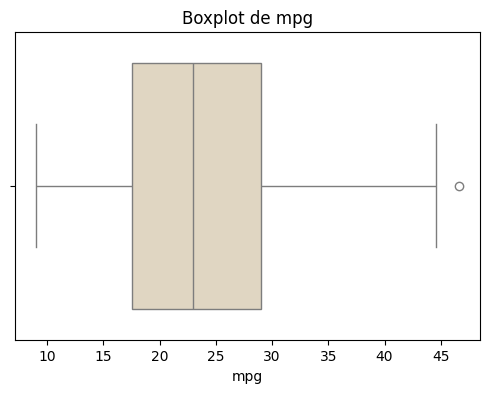

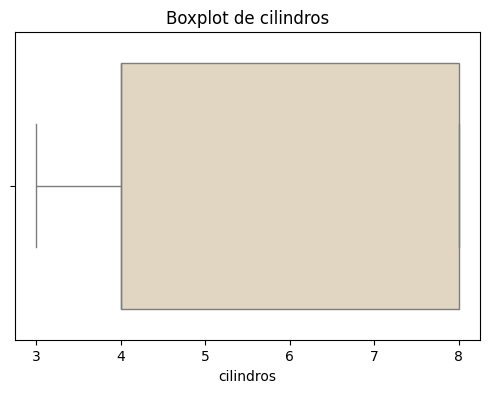

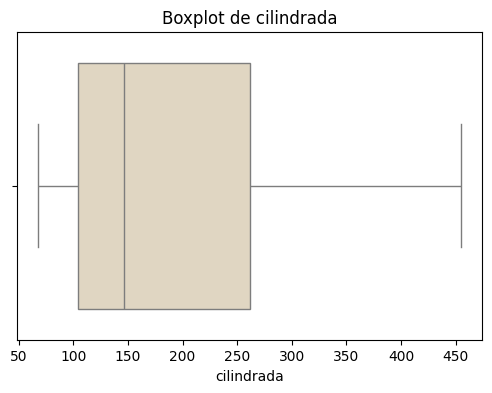

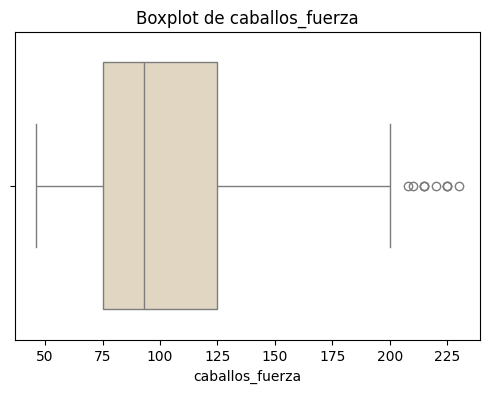

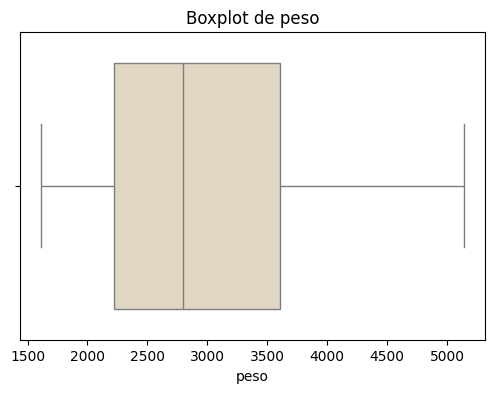

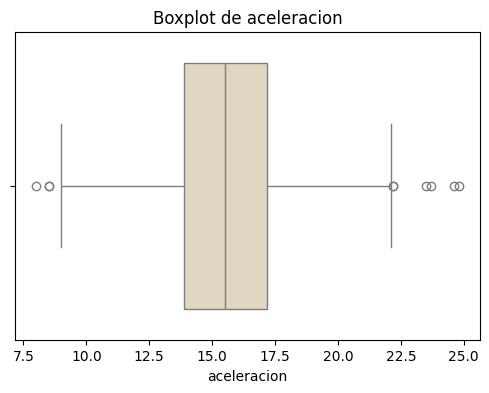

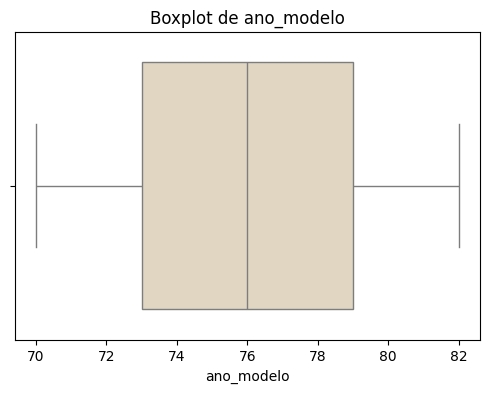

In [63]:
#Creamos el boxplot:
for var in variables:
  plt.figure(figsize=(6,4))
  sns.boxplot(x=df[var],color=color[i])
  plt.title(f'Boxplot de {var}')
  plt.show()

**Grafico mpg:**
Vemos solo un posible outlier, lo podemos interpretar como un auto que rinde mucho más que los demas.


**Grafico cilindros:**
Los auto tienen entre 3 y 8 cilindros, por lo que se ve todo normal.


**Grafico cilindrada:**
Tambien se ve normal como los cilindros.

**Grafico caballos_fuerza:**
Aca se ven algunos outliers bastante claros a la derecha, entre 225-230. Podriamos eliminarlos de ser necesario mas adelante.

**Grafico peso:**
No vemos outliers, el grafico es normal

**Grafico aceleracion:**
Podemos ver algunos outliers tanto bajos como altos, siguen siendo valores normales dentro del rango de vehiculos de calle.

**Graficos ano_modelo y origen:**
Se ven normales.

### Gráficos de dispersión (scatterplots) entre features y target

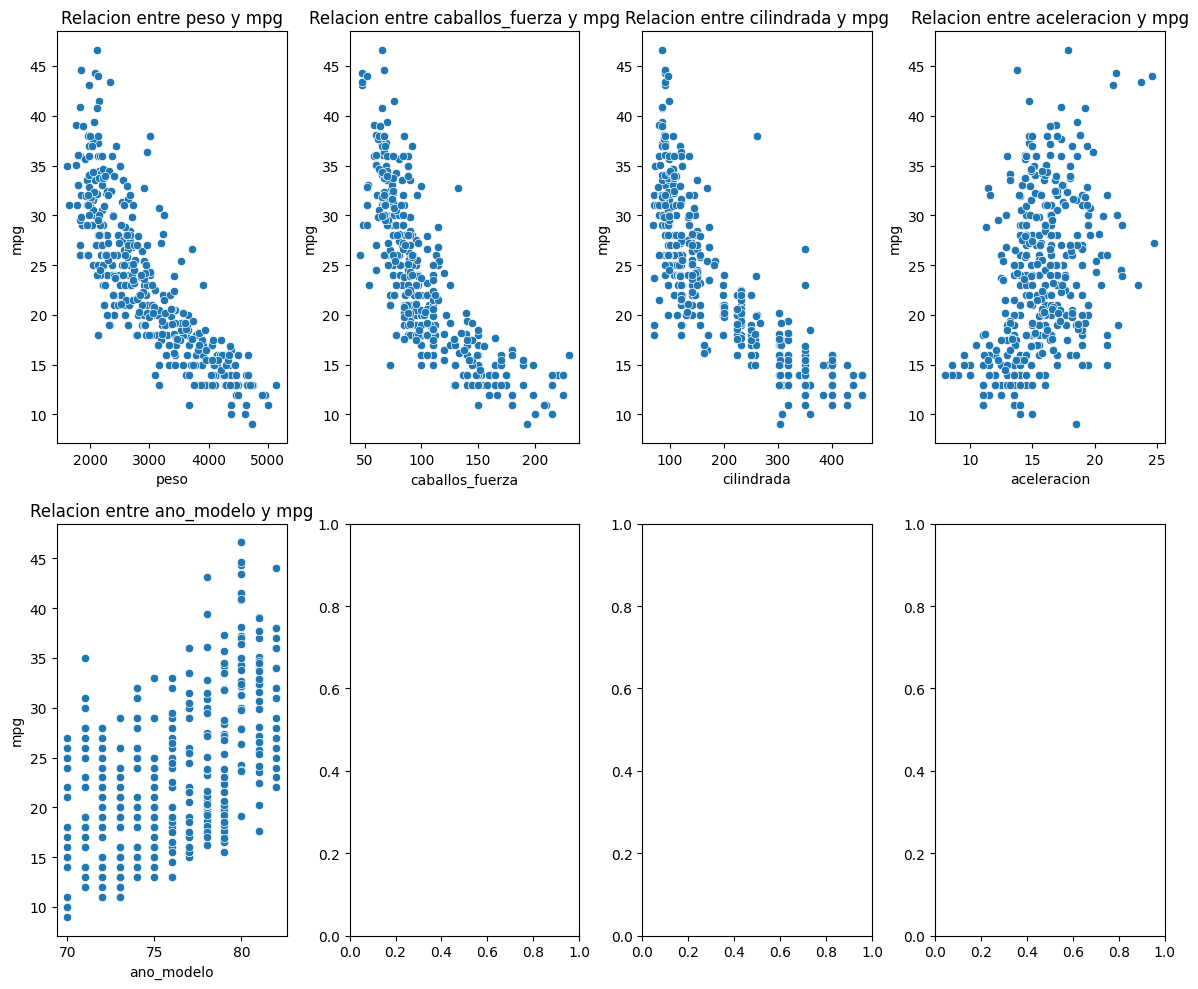

In [64]:
#Veremos si existen relaciones lineales entre features y el target (mpg)

features=['peso','caballos_fuerza','cilindrada','aceleracion','ano_modelo']
target='mpg'

#Determinamos el numero de features y el diseño de la cuadricula:
n_features=len(features)
n_col= 4
n_rows=(n_features+n_col-1)//n_col

#Creamos la figura y los subplots:

fig,axes=plt.subplots(n_rows,n_col,figsize=(12, n_rows * 5))

#Aplanamos el array de axes para facilitar la iteracion:
axes=axes.flatten()

#Hacemoslos graficos de dispersion:
for i, feature in enumerate(features):
  sns.scatterplot(data=df,x=feature,y=target,ax=axes[i])
  axes[i].set_title(f'Relacion entre {feature} y {target}')
  axes[i].set_xlabel(feature)
  axes[i].set_ylabel(target)

plt.tight_layout()
plt.show()

#**Relaciones Lineales preeliminares**
**GRAFICO SCATTERPLOT**

> *PESO>RENDIMIENTO*➡️  Los puntos bajan notablemente hacia la derecha, vemos una RELACION NEGATIVA

> *CABALLOS_FUERZA>RENDIMIENTO*➡️  Otra RELACION NEGATIVA clara.

> *CILINDRADA>RENDIMIENTO*➡️ RELACION NEGATIVA

> *ACELERACION*➡️  El grafico es mucho mas disperso, no podeos determinar un patron, lo que nos indica una RELACION DEBIL O NULA.

>*ANO_MODELO>RENDIMIENTO*➡️El grafico sugiere una relacion positiva, mientras mayor es el año, ejor es el mpg


**GENERALES:**
* cilindrada-cilindros: mayor numero de cilindradas = mayor cilindrada del motor.

* caballos_fuerza-cilindrada: mayor cilindrada = mayor potencia del motor.

* aceleracion-peso: generalmente un vehiculo es en su mayoria pesado por su motor.

* mpg-cilindrada: mayor cilindrada = menor eficiencia de combustible.

* mpg-peso: mayor peso del vehiculo = menor eficiencia de combustible.

* mpg-ano_modelo: mayor año del modelo = mayor eficiencia de combustible.





---



## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - Escalen las features (p.ej., StandardScaler) para comparar coeficientes después.  
   - Dividan en train/test (70-30 o 80-20).  

## Resolución:

###Manejo de valores faltantes:

In [65]:
df.isnull().sum()

,0
mpg,0
cilindros,0
cilindrada,0
caballos_fuerza,6
peso,0
aceleracion,0
ano_modelo,0
origen,0
nombre_auto,0


In [66]:
#Vamos a imputar los 6 datos faltantes de la columna caballos_fuerza con la mediana, ya que presenta outliers segun nuestro boxplot
#Calculamos la mediana
mediana=df['caballos_fuerza'].median()
#Reyenamos con la mediana los valores faltantes
df['caballos_fuerza']=df['caballos_fuerza'].fillna(mediana)

###Features a descartar:
**Origen:** Porque es un variable categorica y no es de importancia para nuestro analisis

**nombre_auto:** Porque es un string y tampoco es de utilidad para el analisis

**NO USARE VARIABLES CATEGORICAS**

In [67]:
#Eliminamos las features:
df=df.drop(['origen','nombre_auto'],axis=1)

###Escalado de features.

Esto se hace para que la regresion lineal funcione bien y los coeficientes sean comparables.

In [68]:
from sklearn.preprocessing import StandardScaler

#Features y target
X=df.drop('mpg',axis=1)
y=df['mpg']

#Escalamos las features
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

#Convertimos X_scaled a dataframe, esto lo resolvi con chat gpt porque me daba error a la hora de hacer os coeficientes con los nombres de las columnas.
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

###Division en train/test

In [69]:
#Importamos la funcion train_test_split que nos ayudara dividir nuestros datos:
from sklearn.model_selection import train_test_split
#Separamos en datos de entrenamienro y datos de prueba
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

#Tamaño de los conjuntos:
print('Tamaño del conjunto de entrenamiento:',X_train.shape)
print('Tamaño del conjunto de prueba:',X_test.shape)

Tamaño del conjunto de entrenamiento: (277, 6)
Tamaño del conjunto de prueba: (120, 6)


>El X_train es el conjunto de caracteristicas (features) que se usan para entrenar al modelo.Es el 80% de X_scaled.

>El X_test tambien es el conjunto de caracteristicas pero este se usa para evaluar al modelo despues de entrenarlo. Contiene el 20% de los datos de X_scaled.

>El y_train es la variable objeto (target) del conjunto de entrenamiento, el modelo aprende a predecir y_train a partir de X_train. Contiene el 80% de los datos de 'y'.

>El y_test es la variabe objeto del conjunto de prueba, se usa para comparar predicciones del modelo de X_test con los valores reales (y_test) y asi evaluar su rendimiento en datos que nunca vio en el entrenamiento. Contiene el 20% de los datos de 'y'



---






## 4. **Regresión Lineal**  
   - Ajusten un modelo de regresión lineal (usando `sklearn.linear_model.LinearRegression`).  
   - Obtengan:  
     - Coeficientes (pesos) del modelo.  
     - Evaluar métricas en el set de entrenamiento y en el de testeo: **R²**, MSE (error cuadrático medio), MAE.  


In [70]:
#Importamos la clase LinearRegression, que nos ayudara a crear el modelo
from sklearn.linear_model import LinearRegression

#Creamos el modelo
modelo=LinearRegression()
#Llamamos al metodo fit, que es el que hace que le modelo aprenda, usando los datos de X_train y de y_train.
modelo.fit(X_train,y_train)

LinearRegression()

In [71]:
#Obtenemos los coeficientes:
coef=modelo.coef_

df_coef=pd.DataFrame({'Feature':X_train.columns,
                      'Coeficientes':coef})
df_coef

,Feature,Coeficientes
0,cilindros,0.160239
1,cilindrada,-0.880671
2,caballos_fuerza,-0.026877
3,peso,-5.307892
4,aceleracion,-0.135251
5,ano_modelo,2.604305


En la columna feature vemos el nombre de la caracteristica y en la de coeficientes vemos el valor numerico que el modelo asigno a esa caracteristica.


>cilindros: Coef.Positivo Pequeño, sugiere un impacto pequeño en el MPG.

>cilindrada: Coef.Negativo Medio/Alto, sugiere que al aumentar la cilindrada el MPG disminuye.

>caballos_fuerza: Coef.Negativo muy pequeño, sugiere que el impacto de los caballos de fuerza es negativo pero muy debil al lado de las demas caracteristicas.

>peso: Coef.Negativo MUY ALTO, sugiere que el peso es una caracteristica de impacto negativo en el MPG. Los vehiculos mas pesados consumen mucha mas gasolina.

>aceleracion: Coef.Negativo Pequeño, sugiere un impacto negativo pequeño de la aceleracin en el MPG.

>ano_modelo: Coef.Positivo Alto, sugiere que por cada aumento de una unidad de año, el MPG aumenta en aproximadamente 6 unidades. Pudiendose deber a los avances tecnologicos.

###Evaluamos las metricas en el set de entrenamiento y testeo

In [72]:
#Importamos las funciones para evaluar el rendimiento del modelo
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

#Usa el modelo ya entrenado para hacer predicciones sobre los datos de X_train y las guarda en la variable
y_train_pred=modelo.predict(X_train)
#Tambien usa el modelo ya entrenado para hacer predicciones sobre el X_test.
y_test_pred=modelo.predict(X_test)

#Imprimimos los resultados del entrenamiento:
print('Entrenamiento:')
#Coeficiente de Determinacion R2 comparando los resultados del entrenamiento, con las predicciones que el modelo hizo.
print('R2:',r2_score(y_train,y_train_pred))
#Calcula el Error Cuadratico Medio, comparando y_train y y_train_pred
print('MSE:',mean_squared_error(y_train,y_train_pred))
print('MAE:',mean_absolute_error(y_train,y_train_pred))

print('Testeo:')
print('R2:',r2_score(y_test,y_test_pred))
print('MSE:',mean_squared_error(y_test,y_test_pred))
print('MAE:',mean_absolute_error(y_test,y_test_pred))

Entrenamiento:
R2: 0.8155204298728619
MSE: 11.814496318489473
MAE: 2.639804718002619
Testeo:
R2: 0.7741579160623601
MSE: 12.194751719981321
MAE: 2.646457309617626


>**R²** mide que tan bien las predicciones del modelo se ajustan a los resultados reales en los datos de entrenamiento.
*  Un valor cercano a 1 es muy bueno, por lo tanto de en _entrenamiento_ es **0.81** y en _testeo_ es **0.77** esto es bastante bueno. En resumen el modelo logra explicar aprox el **77.4%** de las razones por las que MPG varia de un vehiculo a otro en el conjunto de datos que nunca vio.

>**MSE** mide el error promedio al cuadrado en las predicciones del entrenamiento. El MSE del _testeo_ es de **12.19**, un poco mas alto al de _entrenamiento_. La diferencia es muy pequeña lo cual es bueno.

>**MAE**nos indica cuanto en promedio se equivoco el modelo en sus predicciones. En resumen el margen de error promedio para predecir el mpg de un vahiculo es de 2.65 unidades de MPG, del valor de MPG real del vehiculo.



## 5. **Importancia de Variables**  
   - Analicen los **coeficientes** del modelo:  
     - Valores absolutos altos → mayor impacto en el target.  
     - Signo: Relación positiva/negativa con el target.  
   - Comparen la magnitud de los coeficientes **escalados** (si usaron features en distintas unidades).  
   - **5.1. Opcional**:
     Otra forma es "desordenar" un feature y ver cómo empeora el modelo. Si al desordenarlo el error aumenta mucho, ese feature era importante. Usen métodos como:  
     - **Permutation Importance** (de sklearn) para validar importancia. Más info en https://scikit-learn.org/stable/modules/permutation_importance.html



## Resolución:

In [73]:
coef=modelo.coef_
df_coef=pd.DataFrame({'Feature':X_train.columns,
                      'Coeficientes':coef,
                      'Importancia':np.abs(coef),
                      'Signo':['Positivo' if c >0 else 'Negativo' for c in coef]})

df_coef.sort_values(by='Importancia', ascending=False)

,Feature,Coeficientes,Importancia,Signo
3,peso,-5.307892,5.307892,Negativo
5,ano_modelo,2.604305,2.604305,Positivo
1,cilindrada,-0.880671,0.880671,Negativo
0,cilindros,0.160239,0.160239,Positivo
4,aceleracion,-0.135251,0.135251,Negativo
2,caballos_fuerza,-0.026877,0.026877,Negativo


##**_Relacion_**

**PESO**: _Esta es la caracteristica con mayor impacto negativo en el MPG, significa que a medida que el peso aumenta, el MPG predicho disminuye significativamente. Este es el factor mas imporatnte para predecir un MPG bajo._

* **_Coeficiente:_** -5.307892

* **_Valor absoluto:_** 5.307892

* **_Signo:_** Negativo


**AÑO MODELO**: _Esta es la caracteristica con mayor impacto positivo en el MPG, significa que a medida que el año modelo del modelo aumenta, el MPG aumenta tambien._

* **_Coeficiente:_** 2.604305

* **_Valor absoluto:_** 2.604305

* **_Signo:_** Positivo

**CILINDRADA**:_Un impacto negativo moderado, significa que al aumentar la cilindrada del motor, el MPG dsiminuye._

* **_Coeficiente:_** -0.880671

* **_Valor absoluto:_** 0.880671

* **_Signo:_** Negativo

**CILINDROS**: _Tiene un impacto positivo pero de baja magnitud, significa que al aumentar el numero de cilindros el mpg aumenta en muy poca medida. Esto parece contrario a lo que interpretamos en los datos preeliminares, esto se debe a que el modelo cuando comenzo a indagar, encontro relaciones lineal teniendo en cuenta tambien las otravariables, y capturo relaciones mas fuertes con otras caracteristicas.

* **_Coeficiente:_** 0.160239

* **_Valor absoluto:_** 0.160239

* **_Signo:_** Positivo

**ACELERACION**: _Impacto negativo pequeño, significa que el aumento de la aceleracion se asocia a una leve disminucion del MPG._

* **_Coeficiente:_** -0.135251

* **_Valor absoluto:_** 0.135251

* **_Signo:_** Negativo

**CABALLOS DE FUERZA**:_La mas baja de todas, indica que un aumento de los caballos causa una minima disminucion en el MPG._

* **_Coeficiente:_** -0.026877

* **_Valor absoluto:_** 0.026877

* **_Signo:_** Negativo


## 6. **Reflexión**  
   - ¿Cuáles variables son más importantes según el modelo? ¿Coincide con su análisis exploratorio?  
   - ¿El modelo tiene buen rendimiento (R² alto, MSE bajo)? Si no, ¿a qué podría deberse?  



## Resolución:

Segun el modelo las variables más importantes son **PESO Y AÑO DEL MODELO**
Esto coincide con el analisis previo que hice, pero crei que las cilindradas y los caballos de fuerza iban a ser los mas importantes, tambien basandome solo en mi logica sobre autos. Pero tiene mucho sentido que estas dos variables sean de gran influencia para la prediccion de mpg. Entonces si, creo que el analisis previo y los resultados del modelo son muy alentadores.

El modelo SI tiene un buen rendimiento, ya que R² es bastante cercano a 1 (0.88), lo que indica que el modelo explica una gran parte de la variabilidad del target (mpg), la diferencia entre el entrenamiento y el testeo no es para nada grande, lo que sugiere que el modelo generacliza bien y no esta sobreajustado.

Mis inspiraciones a o largo del desarrollo del trabajo, aunque no las fui marcando de lo apurada que estaba, fueron: Apuntes y notebooks de las clases, Notebooks del año pasado con otros profes, chatgpt y tiktok para aprender a usar github 😂


## **Bonus**:  
- Prueben eliminar variables "poco importantes" y reentrenar el modelo. ¿Mejora el rendimiento?  


---

### **Tips**:  
- Si el R² es muy bajo, revisen si hay relaciones no lineales (y consideren transformar features).  
- Documenten cada paso: ¡la trazabilidad es clave en ciencia de datos!  




---



#**Redes Neuronales**

 Utilice redes neuronales para resolver el problema de regresión del dataset que Ud. trabajó en TP1.

2.1 Usar MLP con la librería MLP.

In [74]:
import pandas as  pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error


2.2 Presentar un caso donde la MLP sobreajuste.

In [75]:
#CREAMOS EL MODELO 1 SOBREAJUSTADO
mod1=MLPRegressor(hidden_layer_sizes=(150,150),
                  max_iter=2000,
                  alpha=0.00001,
                  learning_rate_init=0.005,
                  random_state=42,
                  verbose=False)

#ENTRENAMOS EL MODELO 1
mod1.fit(X_train,y_train)

#HACEMOS PREDICCIONES
y_train_pred=mod1.predict(X_train)
y_test_pred=mod1.predict(X_test)

#CALCULAMOS 'Mean_squared_error'
mse_train=mean_squared_error(y_train,y_train_pred)
mse_test=mean_squared_error(y_test,y_test_pred)

#MOSTRAMOS LOS RESULTADOS
print('\nRESULTADOS DE MODELO 1')
print('MSE entrenamiento:',mse_train)
print('MSE testeo:',mse_test)



RESULTADOS DE MODELO 1
MSE entrenamiento: 4.060678310231282
MSE testeo: 10.69214601318449


Para arrancar quise mostrar bien el sobreajuste. Configure el hidden_layer_sizes como (150,150) un cerebro de red  grande, con muchas neuronas en dos capas diferentes, lo que lo vuelve facil de sobreajustar. Una regularizacion de alpha=0.00001, muy minima y un max_itter alto (numero maximo de veces que el modelo vio los datos de entrenamiento para aprender). Estos valores lograron que el modelo sobreajuste de forma sencilla.

Podemos ver que el MSE de entrenamiento es extremadamente bajo (4.06), significa que el modelo memoriza las respuestas en vez de aprender de los datos.

Y un MSE de testeo  mas alto que el de entrenamiento (10.69) nos dice que el modelo rinde mal con datos que nunca vio. Lo que refuerza que el modelo memoriza sin aprender bien.

2.3 Presentar un caso donde la MLP subajuste.

In [76]:
#CREAMOS EL MODELO 2 SUBAJUSTADO
mod2=MLPRegressor(hidden_layer_sizes=(5,),
                  max_iter=1000,
                  alpha=0.0001,
                  learning_rate_init=0.001,
                  random_state=42,
                  verbose=False)

#ENTRENAMOS EL MODELO 2
mod2.fit(X_train,y_train)

#HACEMOS PREDICCIONES
y_train_pred=mod2.predict(X_train)
y_test_pred=mod2.predict(X_test)

#CALCULAMOS 'Mean_squared_error'
mse_train=mean_squared_error(y_train,y_train_pred)
mse_test=mean_squared_error(y_test,y_test_pred)

#MOSTRAMOS LOS RESULTADOS
print('\nRESULTADOS DE MODELO 2')
print('MSE entrenamiento:',mse_train)
print('MSE testeo:',mse_test)


RESULTADOS DE MODELO 2
MSE entrenamiento: 95.96730269171468
MSE testeo: 97.3256157833324


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Primero genere una arquitectura de cerebro bastante simplificada con hidden_layer_sizes(5,), combinando con un max_itter ajo de 1000 y un aplha=0.0001 (bajo) y una tasa de aprendizaje de 0.001. Los resultados de ambos conjuntos fueron muy altos y similares.

El MSE de entrenamiento (95.96), como el de testeo (97.32) fueron muy altos. Esto significa que el modelo era demasiado simple para ver patrones en los datos. Esto sucedio porque ajustamos un cerebro pequeño con pocas neuronas y una capa oculta, pocas horas de estudio de los datos, y demas ajustes.



2.4 Presentar el caso donde cree que la MLP funciona de forma aceptable.

In [77]:
#CREAMOS EL MODELO 3 CON RENDIMIENTO ACEPTABLE
mod3=MLPRegressor(hidden_layer_sizes=(40,20),
                  max_iter=4000,
                  alpha=0.1,
                  learning_rate_init=0.001,
                  random_state=42,
                  verbose=False)

#ENTRENAMOS EL MODELO 3
mod3.fit(X_train,y_train)

#HACEMOS PREDICCIONES
y_train_pred=mod3.predict(X_train)
y_test_pred=mod3.predict(X_test)

#CALCULAMOS 'Mean_squared_error'
mse_train=mean_squared_error(y_train,y_train_pred)
mse_test=mean_squared_error(y_test,y_test_pred)

#MOSTRAMOS LOS RESULTADOS
print('\nRESULTADOS DE MODELO 3')
print('MSE entrenamiento:',mse_train)
print('MSE testeo:',mse_test)


RESULTADOS DE MODELO 3
MSE entrenamiento: 5.866872255417751
MSE testeo: 9.625866438916578


El MODELO 1 tenia un cerebro muy grande, sin muchas reglas y memorizaba todo.
El MODELO 2 tenia u cerebro muy p¿chico que no lograba entender nada.

En el MODELO 3 intente buscar un equilibrio, lo mejor que se pueda.
Comence con un cerebro (50-20), pero aun con algunos ajustes regulados seguia mostrando un sobreajuste. Lo reduci un poco a (40-20) y logre que mejore bastante, se noto que el modelo ya podaia capturar mejor los patrones. El tiempo de entrenamiento fue suficiente para que aprenda.

En resumen del modelo:
- Fue lo suficientemente complejo para entender patrones.
- Suficientemente disciplinado para ignorar el ruido y generalizar bien.
-Entreno el tiempo justo para encontrar una configuracion optima.

Tanto para 2.2, 2.3 y 2.4 deberá entrenar un modelo de red neuronal multicapa (MLP) con diferentes configuraciones de hiperparámetros.

Debe indicar las métricas de evaluación de los modelos e indicar como determina si sobreajusta (overfeatting) o si subajusta (underfitting)

###**La metrica que use fue la misma que utilizo la profesora en el colab que nos dio con la teoria de Redes Neuronales, el Error Cuadratico Medio (MSE)**

Calcula la diferencia al cuadrado entre los valores reales y los valores que predice el modelo, y luego calcula el promedio de esas diferencias.

**Utilice el MSE en los conjuntos de entrenamiento y de testeo de los 3 modelos:**
- MSE DE ENTRENAMIENTO: Cuan bien rinde el modelo con los datos que ya conocio en el aprendizaje
- MSE DE TESTEO: Cuan bien rinde el modelo con datos que no conoce.

Esta relacion nos permite ver si el modelo esta sobreajustando (underfitting) o subajustando (overfitting).

El underfitting se da cuando el MSE ENTRENAMIENTO es muy alto- MSE TESTEO es muy alto tambien o similar al de entrenamiento. Esto puede deberse a que el modelo es muy simple o no se entreno lo suficiente. No logra entender de los datos que se le mostraron por lo que no consigue rendir bien en ninguno de los dos conjuntos

El overfitting se da cuando el MSE ENTRENAMIENTO es muy bajo- MSE TESTEO es mas alto que el de entrenamiento. Esto puede suceder si el modelo es muy complejo o se sobreentreno. Y en lugar de aprender los patrones, memorizo los datos de entrenamiento.



##**GRAFICO MODELOS: Entrenamiento y Testeo**

In [78]:
import matplotlib.pyplot as plt
import numpy as np

resultados = {
    'Modelo': ['Modelo 1', 'Modelo 2', 'Modelo 3'],
    'MSE Train': [4.0607, 95.9673, 5.8669],
    'MSE Test': [10.6921, 97.3256, 9.6259]}

In [79]:
df=pd.DataFrame(resultados)
df

,Modelo,MSE Train,MSE Test
0,Modelo 1,4.0607,10.6921
1,Modelo 2,95.9673,97.3256
2,Modelo 3,5.8669,9.6259


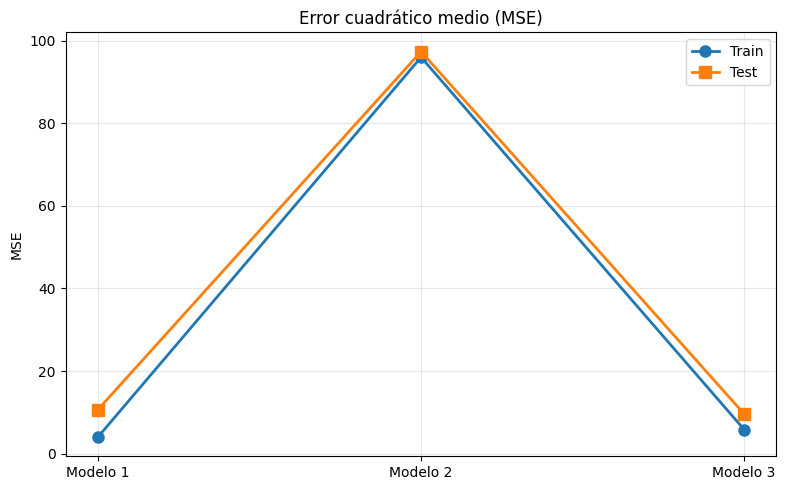

In [80]:
#graficamos
fig,ax=plt.subplots(figsize=(8,5))
x=range(len(resultados['Modelo']))

#MSE GRAFICO
ax.plot(x, resultados['MSE Train'], 'o-', label='Train', linewidth=2, markersize=8)
ax.plot(x, resultados['MSE Test'], 's-', label='Test', linewidth=2, markersize=8)
ax.set_title('Error cuadrático medio (MSE)')
ax.set_ylabel('MSE')
ax.set_xticks(x)
ax.set_xticklabels(resultados['Modelo'])
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

modelo 1:
podemos ver el sobreajuste, el modelo aprendio tan bien a momorizar los datos que cuando se testeo dio un error mas alto.

modelo 2: era muy simple y su error en ambos conjuntos fue muy alto.

modelo 3: logramos mejorar el rendimiento del modelo, esta bastante equilibrado, su error fue bajo tanto en datos conocidos como desconocidos, por eso es el modelo mas equilibrado.
